In [126]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28 * 28)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28)
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [127]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=1000,
                    validation_data=(X_test, y_test))

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.7667 - loss: 0.8921 - val_accuracy: 0.9438 - val_loss: 0.1905
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.9489 - loss: 0.1711 - val_accuracy: 0.9617 - val_loss: 0.1284
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.9679 - loss: 0.1079 - val_accuracy: 0.9678 - val_loss: 0.1020
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9778 - loss: 0.0765 - val_accuracy: 0.9738 - val_loss: 0.0789
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9841 - loss: 0.0543 - val_accuracy: 0.9766 - val_loss: 0.0711
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9885 - loss: 0.0403 - val_accuracy: 0.9766 - val_loss: 0.0746
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9916 - loss: 0.0301 - val_accuracy: 0.9788 - val_loss: 0.0662
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9935 - loss: 0.0241 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


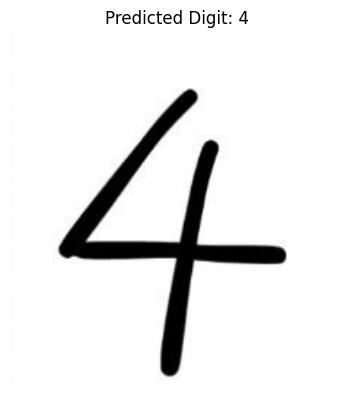

số của m là:4


In [129]:
import cv2
import matplotlib.pyplot as plt
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 28 * 28)
    return img
def predict_digit(image_path):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)
    predicted_digit = np.argmax(prediction)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.axis('off')
    plt.show()
    print(f'số của m là:{predicted_digit}')
image_path = '/content/4.png'
predicted_digit = predict_digit('/content/Ảnh màn hình 2025-03-15 lúc 11.07.22.png')